<h3>Import Dataset</h3>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("data/Video_games_esrb_rating.csv")
df_test = pd.read_csv("data/test_esrb.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [5]:
df_train.head(10)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
7,Blightbound,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,T
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,T


<h3>Preprocssing</h3>

In [6]:
X_train = df_train.iloc[:, 1:-1]
X_train.shape

(1895, 32)

In [7]:
y_train = df_train.iloc[:, -1]
y_train.shape

(1895,)

In [8]:
X_test = df_test.iloc[:, 1:-1]
X_test.shape

(500, 32)

In [9]:
y_test = df_test.iloc[:, -1]
y_test

0       T
1       E
2       T
3       E
4      ET
       ..
495     M
496     M
497     M
498     T
499     T
Name: esrb_rating, Length: 500, dtype: object

In [10]:
labels = y_train.unique()
labels

array(['E', 'ET', 'M', 'T'], dtype=object)

<h3>Model Building</h3>

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [12]:
y_predict = rfc.predict(X_test)
#y_predict = label_encoder.inverse_transform(y_predict)
y_predict

array(['T', 'E', 'M', 'E', 'ET', 'M', 'M', 'ET', 'E', 'T', 'T', 'T', 'ET',
       'ET', 'T', 'M', 'M', 'T', 'E', 'ET', 'T', 'ET', 'ET', 'T', 'ET',
       'ET', 'ET', 'T', 'M', 'T', 'T', 'ET', 'ET', 'T', 'T', 'T', 'M',
       'ET', 'E', 'T', 'T', 'T', 'ET', 'M', 'E', 'E', 'T', 'ET', 'ET',
       'ET', 'T', 'T', 'M', 'ET', 'T', 'ET', 'ET', 'T', 'T', 'T', 'E',
       'T', 'ET', 'E', 'M', 'ET', 'T', 'E', 'E', 'E', 'E', 'ET', 'T',
       'ET', 'T', 'ET', 'T', 'M', 'E', 'E', 'T', 'T', 'T', 'ET', 'E', 'T',
       'T', 'T', 'ET', 'ET', 'E', 'ET', 'T', 'T', 'T', 'E', 'ET', 'ET',
       'ET', 'T', 'E', 'E', 'T', 'T', 'T', 'E', 'M', 'T', 'T', 'T', 'T',
       'ET', 'ET', 'T', 'E', 'T', 'T', 'ET', 'T', 'E', 'T', 'T', 'ET',
       'E', 'T', 'T', 'E', 'ET', 'ET', 'T', 'ET', 'T', 'M', 'ET', 'E',
       'T', 'ET', 'T', 'ET', 'ET', 'E', 'T', 'T', 'T', 'M', 'T', 'M', 'T',
       'ET', 'ET', 'ET', 'E', 'ET', 'T', 'E', 'E', 'E', 'M', 'T', 'T',
       'ET', 'ET', 'ET', 'E', 'M', 'ET', 'M', 'E', 'ET', 'T', 

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average="weighted")

accuracy, precision

(0.842, 0.8485647843601896)

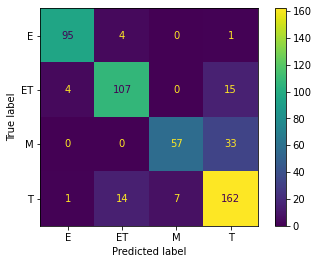

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

<h3>Compare Different Number of Estimators</h3>

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
%matplotlib inline

def TestRandForest(X_train, y_train, X_test, y_test, n_est=100, verbose=3):
    #verbose flags: 1<<0 print accuracy and precision, 1<<1 plot confusion matrix 
    rfc = RandomForestClassifier(n_estimators=n_est, n_jobs=-1)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average="weighted")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
    if verbose & (1 << 0) > 0:
        print(f'n_estimators = {n_est} Accuracy : {accuracy:.4f}   Precision(weighted) : {precision:.4f}')
    if verbose & (1 << 1) > 0:
        disp.plot()
        plt.title("Randon Forest Classifier (n_estimators=" + str(n_est) +")")
        plt.show()
    return disp, accuracy, precision

n_estimators = 1 Accuracy : 0.7920   Precision(weighted) : 0.7927


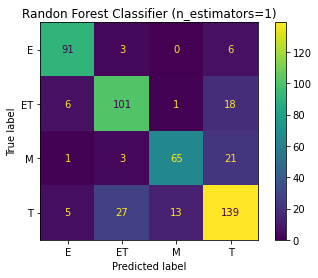

n_estimators = 10 Accuracy : 0.8460   Precision(weighted) : 0.8510


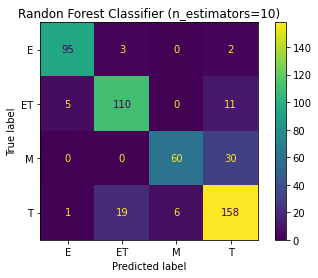

n_estimators = 50 Accuracy : 0.8460   Precision(weighted) : 0.8512


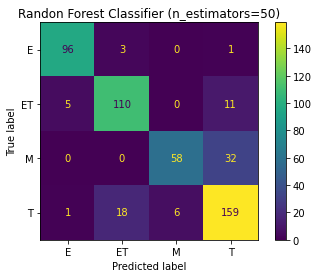

n_estimators = 100 Accuracy : 0.8440   Precision(weighted) : 0.8501


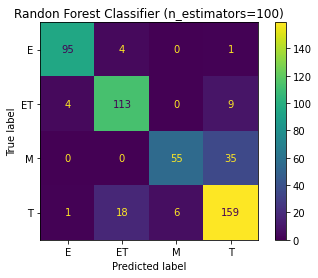

n_estimators = 500 Accuracy : 0.8440   Precision(weighted) : 0.8507


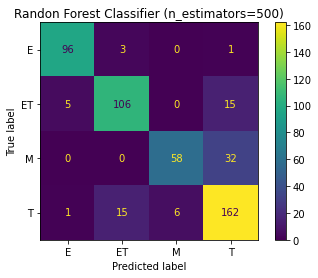

In [16]:
for n in [1, 10, 50, 100, 500]:
    disp, accuracy, precision = TestRandForest(X_train, y_train, X_test, y_test, n_est=n, verbose=3)

<h3>PCA</h3>

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [18]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(1895, 2)

In [19]:
X_test_pca = pca.fit_transform(X_test)
X_test_pca.shape

(500, 2)

n_estimators = 50 Accuracy : 0.4700   Precision(weighted) : 0.4219


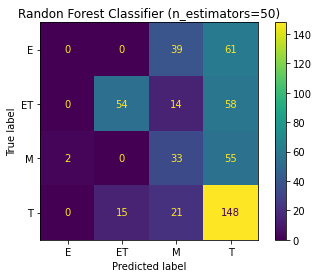

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1dabaf73070>,
 0.47,
 0.4218742671387938)

In [20]:
TestRandForest(X_train_pca, y_train, X_test_pca, y_test, 50)

<h3>Compare Different Number of PCA Components</h3>

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def ApplyPCA(X_train, X_test, n_compo=2):
    pca = PCA(n_components=n_compo)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.fit_transform(X_test)
    return X_train_pca, X_test_pca

In [22]:
results = pd.DataFrame(index=range(2, 33), columns=["accuracy", "precision"], dtype=float)
results = results.fillna(0)
results.shape

(31, 2)

In [23]:
for n in range(2, 33):
    X_train_pca, X_test_pca = ApplyPCA(X_train, X_test, n_compo=n)
    disp, accuracy, precision = TestRandForest(X_train_pca, y_train, X_test_pca, y_test, n_est=50, verbose=0)
    results.iloc[n - 2, 0] = accuracy
    results.iloc[n - 2, 1] = precision

In [24]:
results

,accuracy,precision
2,0.446,0.403159
3,0.424,0.379058
4,0.470,0.505288
5,0.422,0.414613
6,0.504,0.545170
7,0.398,0.445816
8,0.418,0.391856
9,0.424,0.389744
10,0.368,0.377419
11,0.404,0.380644


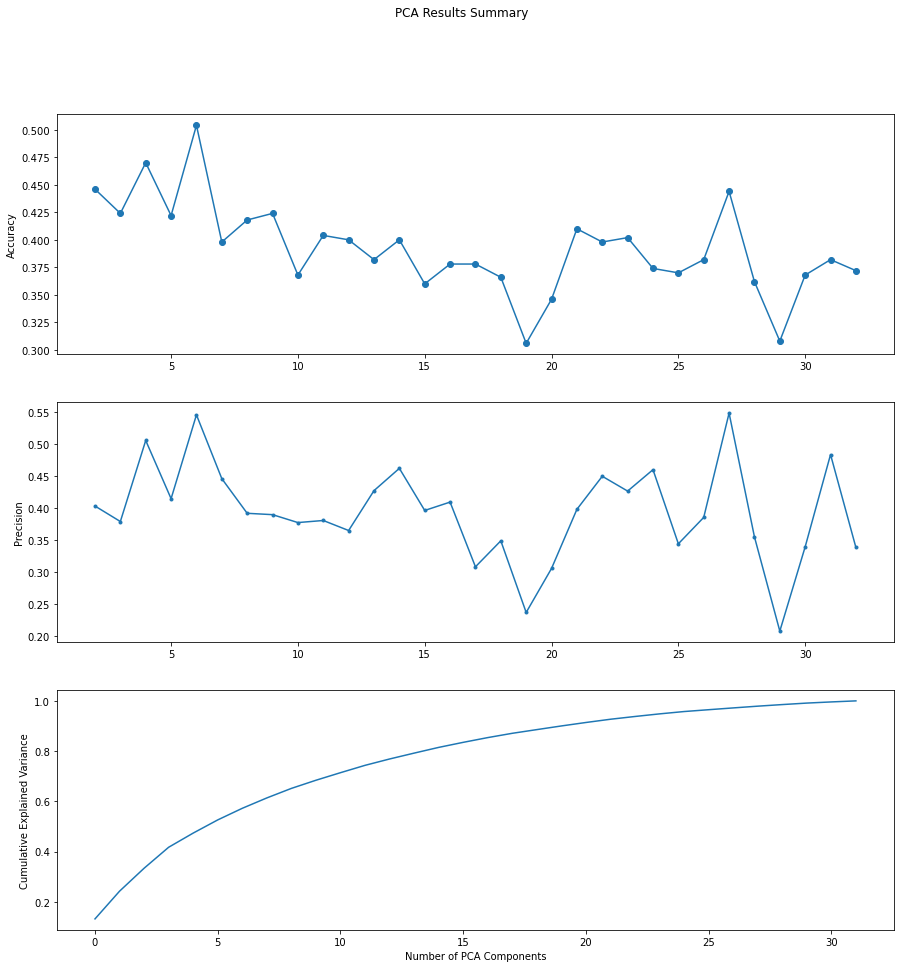

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle('PCA Results Summary')

ax1.plot(results.index, results.accuracy, 'o-')
ax1.set_ylabel('Accuracy')

ax2.plot(results.index, results.precision, '.-')
ax2.set_ylabel('Precision')

pca_plot = PCA().fit(X_train)
ax3.plot(np.cumsum(pca_plot.explained_variance_ratio_))
ax3.set_ylabel('Cumulative Explained Variance')
ax3.set_xlabel('Number of PCA Components')

plt.show()